 ______  ___     ______                        _________
___   |/  /________  /_______ _______ ______________  /
__  /|_/ /_  __ \_  __ \  __ `/_  __ `__ \  _ \  __  / 
_  /  / / / /_/ /  / / / /_/ /_  / / / / /  __/ /_/ /  
/_/  /_/  \____//_/ /_/\__,_/ /_/ /_/ /_/\___/\__,_/   
                                                       
_____________ _________      ___________        _________            
___    |__  /_______  /_____ ___  /__  /_______ ______  /____________
__  /| |_  __ \  __  /_  __ `/_  /__  //_/  __ `/  __  /_  _ \_  ___/
_  ___ |  /_/ / /_/ / / /_/ /_  / _  ,<  / /_/ // /_/ / /  __/  /    
/_/  |_/_.___/\__,_/  \__,_/ /_/  /_/|_| \__,_/ \__,_/  \___//_/     
                                                                     
 


# shAI Training 2023 | Level 1


## Task#10 (MNIST Project)

### Classification

- Before you start make sure you have latest Jupyter notebook version 
- <font color= red> If you have older version fetching the data might be different  </font>  


## Get tha dataset

In [2]:
import numpy as np

import sklearn.datasets
from sklearn.datasets import fetch_openml

mnist =fetch_openml('mnist_784')

### exploring and preparing the dataset

#### print your dataset to get insight

In [3]:
# CODE HERE
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
mnist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '2',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0554/dataset_554.pq',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

#### Split you data into data and labels (target)

In [5]:
# CODE HERE
X, y = mnist["data"], mnist["target"]

#### find the data shape using .shape function

In [6]:
# CODE HERE
X.shape

(70000, 784)

### Peek at one digit from the dataset

In [7]:
import matplotlib
import matplotlib.pyplot as plt

***NOTE: ALL THE COMMANDS FOR PLOTTING A FIGURE SHOULD ALL GO IN THE SAME CELL. SEPARATING THEM OUT INTO MULTIPLE CELLS MAY CAUSE NOTHING TO SHOW UP.***

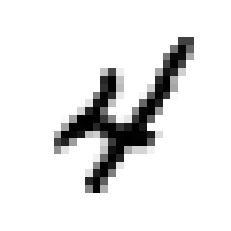

In [8]:
# CODE HERE 

image_index = 9

plt.imshow(np.array(X.iloc[image_index, :], dtype=int).reshape(28, 28), cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

#### Split the data into train and test set

In [9]:
# CODE HERE 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=False)

### Shuffling the training set

In [10]:
#hint shuffle-vs-permutation-numpy
# CODE HERE

permutation = np.random.permutation(len(X_train))

X_train = X_train.loc[permutation].reset_index(drop=True)
y_train = y_train.loc[permutation].reset_index(drop=True)

#### access the label of the above digit image 

In [11]:
# CODE HERE
y[9]

'4'

### Training a <font color= red>Binary</font> classifier 


#### Create the target vectors for this classification task
***NOTE : you can try different number.***

In [12]:
# CODE HERE
# If you got stuck use GOOGLE

y_train_binary = (y_train == '5').astype(int)
y_test_binary  = (y_test == '5').astype(int)

In [13]:
y_train_binary.shape

(56000,)

### SGD classifier

#### Create a SGD classifier 

In [14]:
from sklearn.linear_model import SGDClassifier

In [15]:
# CODE HERE

sgd_clf = SGDClassifier(random_state=42)

#### use SGD classifier  to detect images of the number 5 

In [16]:
# CODE HERE
sgd_clf.fit(X_train, y_train_binary) 

SGDClassifier(random_state=42)

## Performance measure 

####  Measuring Accuracy Using <font color= blue>Cross-validation</font>

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
# CODE HERE

cross_val_score(sgd_clf, X_train, y_train_binary, cv=3, scoring="accuracy")

# array([0.9663, 0.9452, 0.9532])

array([0.95901859, 0.96030428, 0.94262295])

#### Try a dumb classifier

In [19]:
# CODE HERE
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train_binary) 

DummyClassifier(strategy='most_frequent')

#### find cross_val_score for the dumb classifier

In [20]:
# CODE HERE

cross_val_score(dummy_clf, X_train, y_train_binary, cv=3, scoring="accuracy")

# array([0.9112 , 0.9098 , 0.90795])

array([0.90962661, 0.90962661, 0.90967535])

## Confusion matrix

In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#### try to find confusion matrix 

In [22]:
y_pred = sgd_clf.predict(X_train)

In [23]:
# CODE HERE
confusion_matrix(y_train_binary, y_pred)

# array([[52786,  1793],
#        [  913,  4508]], dtype=int64)

array([[50692,   248],
       [ 1612,  3448]], dtype=int64)

####  try perfect classifier which will have only true positives and true negative


In [24]:
# CODE HERE



## Precision and Recall

In [25]:
from sklearn.metrics import precision_score, recall_score,f1_score

***Note that precision and recall score might be different from one to anothor***

#### find precision score

In [26]:
# CODE HERE

precision_score(y_train_binary, y_pred)

0.9329004329004329

#### find recall score

In [27]:
# CODE HERE

recall_score(y_train_binary, y_pred)

0.6814229249011857

#### find f1 score 
***Notice that f1 score is harmonic mean between recall and precision***

In [28]:
# CODE HERE

f1_score(y_train_binary, y_pred)

0.7875742348104157

# Precision/Recall Tradeof

#### try to use decision_function() and make prediction

In [29]:
from sklearn.metrics import precision_recall_curve, auc

# CODE HERE

decision_scores = sgd_clf.decision_function(X_test)
decision_scores

array([ -6848.38782046,   1247.12343   ,   3122.19085767, ...,
       -12895.14011117,   3595.4693855 , -22388.48952425])

In [30]:
sgd_clf.predict(np.array(X_test.iloc[0:10, :]))

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [31]:
y_test_binary[0:10]

56000    0
56001    0
56002    1
56003    0
56004    0
56005    0
56006    0
56007    0
56008    0
56009    0
Name: class, dtype: int32

#### Set the threshold to zero

In [32]:
# CODE HERE

threshold = 0
predictions = (decision_scores >= threshold).astype(int)

precision   = precision_score(y_test_binary, predictions, zero_division=0)
recall      = recall_score(y_test_binary, predictions)
conf_matrix = confusion_matrix(y_test_binary, predictions)

print(f"Precision ---> {precision}")
print(f"Recall ------> {recall}")
print(f"Conf Matrix:\n", conf_matrix)

Precision ---> 0.9238197424892703
Recall ------> 0.6871508379888268
Conf Matrix:
 [[12676    71]
 [  392   861]]


#### Set the threshold to 200000

In [33]:
# CODE HERE

threshold = 200000
predictions = (decision_scores >= threshold).astype(int)

precision   = precision_score(y_test_binary, predictions, zero_division=0)
recall      = recall_score(y_test_binary, predictions)
conf_matrix = confusion_matrix(y_test_binary, predictions)

print(f"Precision ---> {precision}")
print(f"Recall ------> {recall}")
print(f"Conf Matrix:\n", conf_matrix)

Precision ---> 0.0
Recall ------> 0.0
Conf Matrix:
 [[12747     0]
 [ 1253     0]]


#### To decide which threshold you want to use find decision scores for all instances

In [34]:
# CODE HERE

decision_scores

array([ -6848.38782046,   1247.12343   ,   3122.19085767, ...,
       -12895.14011117,   3595.4693855 , -22388.48952425])

#### computing precision and recall for all possible thresholds using the precision_recall_curve() 

In [35]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test_binary, decision_scores)

#### plot precision and recall as functions of the threshold value using Matplotlib

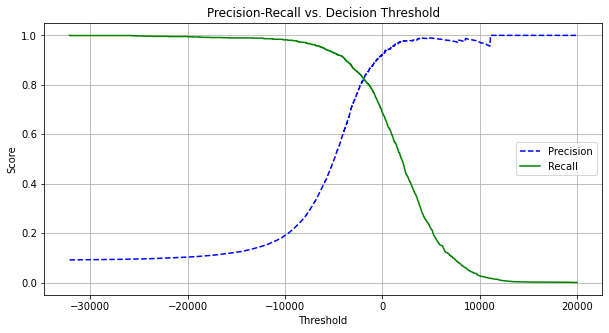

In [36]:
# CODE HERE

plt.figure(figsize=(10, 5))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs. Decision Threshold')
plt.legend(loc='best')
plt.grid()
plt.show()

#### lets aim for 90%recall 
#### try different threshold and see what will happen

In [37]:
threshold = -3000
predictions = (decision_scores >= threshold).astype(int)

print(f"Conf Matrix:\n", conf_matrix)
conf_matrix = confusion_matrix(y_test_binary, predictions)

Conf Matrix:
 [[12747     0]
 [ 1253     0]]


#### precision score

In [38]:
# CODE HERE

precision   = precision_score(y_test_binary, predictions, zero_division=0)
print(f"Precision ---> {precision}")

Precision ---> 0.7262382864792504


#### recall score

In [39]:
#CODE HERE

recall      = recall_score(y_test_binary, predictions)
print(f"Recall ------> {recall}")

Recall ------> 0.8659217877094972


# The ROC Curve

In [40]:
from sklearn.metrics import roc_curve
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test_binary, decision_scores)

#### plot the FPR against the TPR using Matplotlib

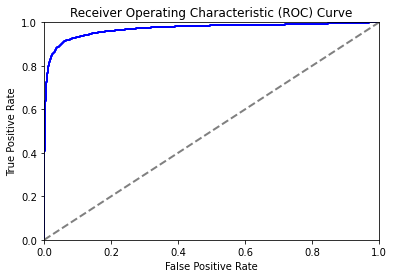

In [41]:
# CODE HERE

plt.figure()
plt.plot(fpr_sgd, tpr_sgd, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

#### computing the ROC AUC score

In [42]:
from sklearn.metrics import roc_auc_score

# CODE HERE 

roc_auc = roc_auc_score(y_test_binary, decision_scores)
print('ROC AUC Score Random Forest : (area = %0.2f)' % roc_auc)

ROC AUC Score Random Forest : (area = 0.97)


# RandomForest Classifier
#### train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
# CODE HERE

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train_binary) 

proba_scores = rfc.predict_proba(X_test)
decision_scores2 = proba_scores[:, 1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_binary, decision_scores2)

#### try to plot ROC 
***Notice that you will need scores not probabilities***

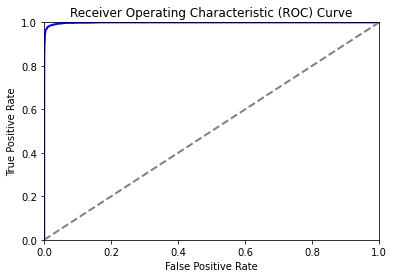

In [45]:
# CODE HERE
# if you got suck use GOOGLE

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

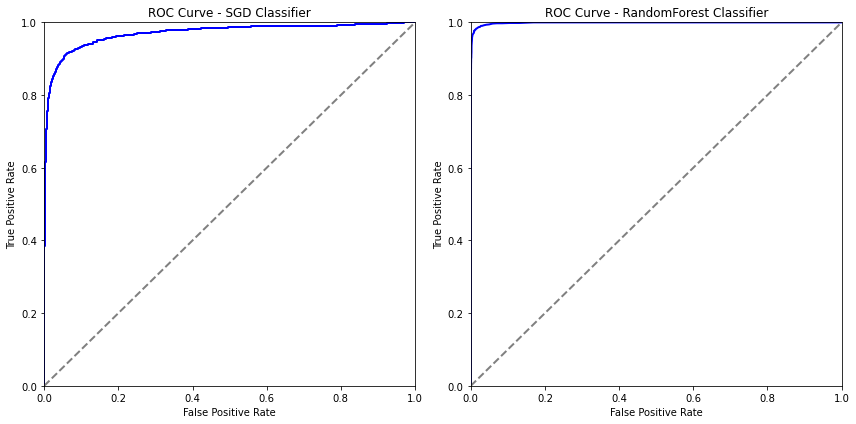

In [46]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot ROC curve for SGD Classifier
ax1.plot(fpr_sgd, tpr_sgd, color='blue', lw=2)
ax1.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve - SGD Classifier')

# Plot ROC curve for RandomForest Classifier
ax2.plot(fpr_rf, tpr_rf, color='blue', lw=2)
ax2.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - RandomForest Classifier')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### find ROC AUC score for randomforestclassifier

In [47]:
# CODE HERE 

roc_auc = roc_auc_score(y_test_binary, decision_scores2)
print('ROC AUC Score Random Forest : (area = %0.2f)' % roc_auc)

ROC AUC Score Random Forest : (area = 1.00)



# Congrats you did it 🥳 !
# #shAI_Club